In [16]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model

In [17]:

#데이터 전처리 함수
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

In [18]:
BS= 32
TS=(24,24)
train_batch= generator('data/train',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('data/valid',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)

Found 4659 images belonging to 2 classes.
Found 187 images belonging to 2 classes.
145 5


In [19]:
# model 파일

def CNN():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
        MaxPooling2D(pool_size=(2,2),strides=1),
        Conv2D(32,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2),strides=1),
 
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2,2),strides=1),


        Dropout(0.25),
   
        Flatten(),
    
        Dense(128, activation='relu'),
    
        Dropout(0.5),
    
        Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) # 모델 엮기
    return model

In [20]:
CNN().model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 22, 22, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 19, 19, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 15, 15, 64)       

In [21]:
model = CNN()

In [22]:
history=model.fit_generator(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)

Epoch 1/15
145/145 [==============================] - 19s 129ms/step - loss: 0.3526 - accuracy: 0.8349 - val_loss: 0.3483 - val_accuracy: 0.9187
Epoch 2/15
145/145 [==============================] - 19s 128ms/step - loss: 0.1906 - accuracy: 0.9313 - val_loss: 0.2280 - val_accuracy: 0.9032
Epoch 3/15
145/145 [==============================] - 18s 122ms/step - loss: 0.1610 - accuracy: 0.9352 - val_loss: 0.2561 - val_accuracy: 0.8968
Epoch 4/15
145/145 [==============================] - 18s 127ms/step - loss: 0.1380 - accuracy: 0.9483 - val_loss: 0.1825 - val_accuracy: 0.9548
Epoch 5/15
145/145 [==============================] - 18s 127ms/step - loss: 0.1154 - accuracy: 0.9544 - val_loss: 0.0488 - val_accuracy: 0.9355
Epoch 6/15
145/145 [==============================] - 17s 116ms/step - loss: 0.1104 - accuracy: 0.9555 - val_loss: 0.2098 - val_accuracy: 0.9097
Epoch 7/15
145/145 [==============================] - 18s 126ms/step - loss: 0.1010 - accuracy: 0.9637 - val_loss: 0.0590 - val_ac

Text(0.5, 0, 'epoch')

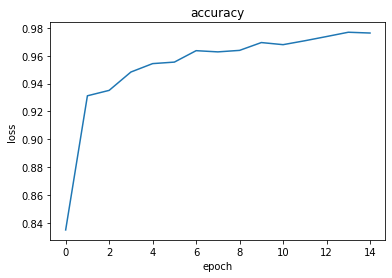

In [24]:
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

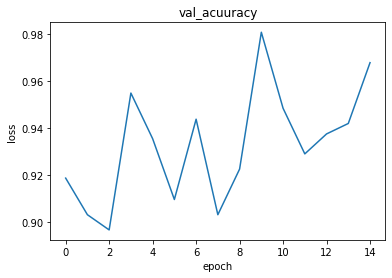

In [25]:
plt.plot(history.history['val_accuracy'])
plt.title('val_acuuracy')
plt.ylabel('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

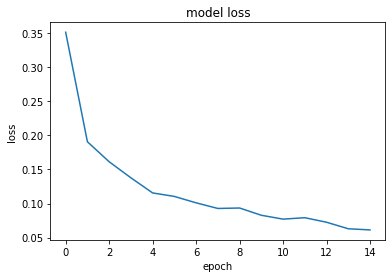

In [26]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

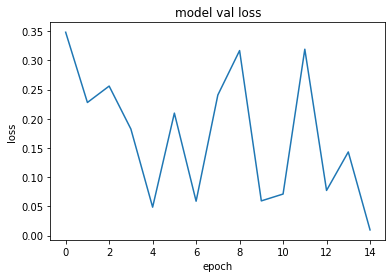

In [27]:
plt.plot(history.history['val_loss'])
plt.title('model val loss')
plt.ylabel('loss')
plt.xlabel('epoch')

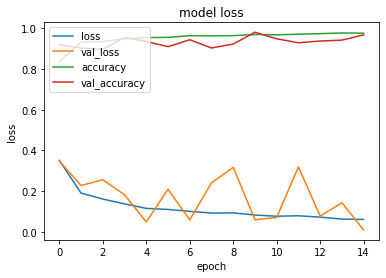

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'], loc='upper left')
plt.show()

In [29]:
model.save('models/mytest.h5', overwrite=True)
#model 최종 저장